In [3]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'../Data/FB.csv')

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [5]:
X = df['Close']

In [6]:
test = X.iloc[-30:]

In [7]:
train = X.iloc[:-30]

In [8]:
''''
smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
optimized (bool) – Should the values that have not been set above be optimized automatically?
''''

SyntaxError: EOL while scanning string literal (<ipython-input-8-58282c2a7da9>, line 4)

In [9]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [10]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 3060.5224710608522
MAE is : 55.156320393038946
RMSE is : 55.32198903746007
MAPE is : 28.209610670924977
R2 is : -166.21615538095995

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116427

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 108.84519758407878
MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE is : 4.826729569629682
R2 is : -4.946917770998036

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 101.81858360183577
MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE is : 4.633748018445831
R2 is : -4.563008361226736

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 101.76016636355348
MAE is : 9.135500785521595
RMSE is : 10.087624416261416
MAPE is : 4.632110274130487
R2 is : -4.5598166493259

/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: 

,RMSE,smoothing parameter
10,9.878157,1.0
9,9.926882,0.9
8,10.008074,0.8


In [11]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116427



/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.68044565575117
MAE is : 8.909413779506675
RMSE is : 9.883341826313162
MAPE is : 4.516280818690797
R2 is : -4.33691509632727



/anaconda/envs/jobs/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Mon, 03 May 2021"
Box-Cox:,False,Time:,14:35:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808445,alpha,True
initial_level,76.525895,l.0,True


In [14]:

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")


In [15]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

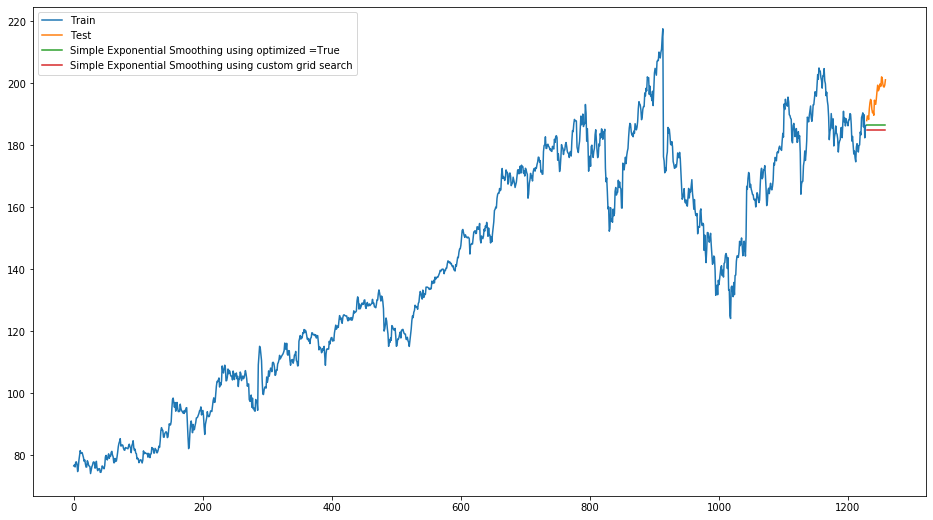

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()